<a href="https://colab.research.google.com/github/ramansingh7/Machine-Learning/blob/main/Spam_message_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df =pd.read_csv('spam.tsv', sep='\t')

In [5]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [15]:
print(df['label'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>


In [16]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [17]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [19]:
ham=ham.sample(spam.shape[0])

In [20]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [23]:
data=ham.append(spam, ignore_index=True)

<ipython-input-23-233c577106ca>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam, ignore_index=True)


In [24]:
data.head()

,label,message,length,punct
0,ham,Going thru a very different feeling.wavering d...,142,3
1,ham,Ummmmmaah Many many happy returns of d day my ...,84,2
2,ham,Also remember to get dobby's bowl from your car,47,1
3,ham,Bring home some Wendy =D,24,1
4,ham,"That's fine, I'll bitch at you about it later ...",50,3


In [25]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [27]:
data.shape

(1494, 4)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

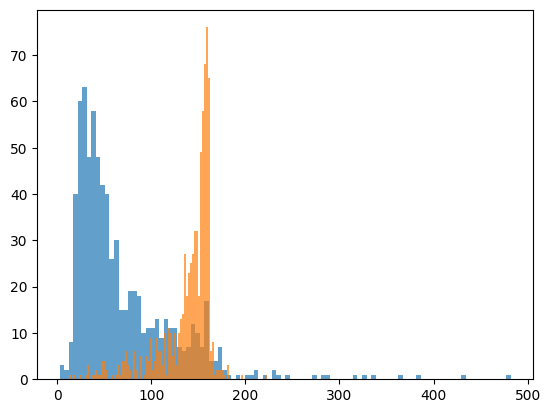

In [32]:
plt.hist(data[data['label']=='ham']['length'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100, alpha=0.7)

(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

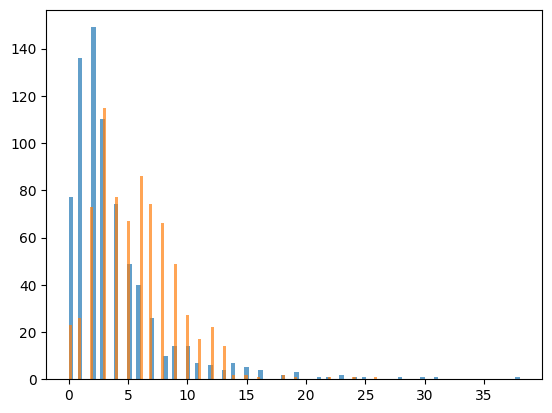

In [35]:
plt.hist(data[data['label']=='ham']['punct'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100, alpha=0.7)

In [36]:
#### traing the model with Random forest Model#######
import sklearn
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, Y_train, Y_test=train_test_split(data['message'], data['label'],
                                                  test_size=0.3, random_state=0, shuffle=True)

In [38]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1045,), (449,), (1045,), (449,))

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [71]:

Classifier=Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier( n_estimators=100))])

In [72]:
Classifier.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [73]:
prediction= Classifier.predict(X_test)

In [47]:
print(prediction)

['spam' 'spam' 'spam' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam'
 'ham' 'ham' 'spam' 'spam' 'spam' 'spam' 'ham' 'spam' 'spam' 'spam' 'ham'
 'spam' 'spam' 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam'
 'spam' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham'
 'ham' 'spam' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'spam' 'spam'
 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham'
 'ham' 'ham' 'spam' 'spam' 'spam' 'spam' 'spam' 'ham' 'ham' 'spam' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham'
 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam' 'spam' 'ham' 'ham'
 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam'
 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'spam' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam'
 'spam' 'ham' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'spam' 'spam' 'ham' 'spam' 'ham' 'spam' 'ham'

In [74]:
Y_test, prediction

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [49]:
###Accuracy finding of model#####
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
accuracy_score(Y_test, prediction)

0.9487750556792873

In [76]:
classification_report(Y_test, prediction)

'              precision    recall  f1-score   support\n\n         ham       0.91      0.99      0.95       227\n        spam       0.99      0.91      0.95       222\n\n    accuracy                           0.95       449\n   macro avg       0.95      0.95      0.95       449\nweighted avg       0.95      0.95      0.95       449\n'

In [77]:
confusion_matrix(Y_test, prediction)

array([[225,   2],
       [ 21, 201]])

In [ ]:
#####train model with SVM#############

In [64]:
from sklearn.svm import SVC
Classifier1=Pipeline([("tfidf", TfidfVectorizer()),("classifier", SVC(C=100, gamma='auto'))])

In [65]:
Classifier1.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [66]:
prediction1=Classifier1.predict(X_test)

In [67]:
Y_test, prediction1

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [68]:
accuracy_score(Y_test, prediction1)

0.9443207126948775

In [69]:
confusion_matrix(Y_test, prediction1)

array([[225,   2],
       [ 23, 199]])

In [70]:
classification_report(Y_test, prediction1)

'              precision    recall  f1-score   support\n\n         ham       0.91      0.99      0.95       227\n        spam       0.99      0.90      0.94       222\n\n    accuracy                           0.94       449\n   macro avg       0.95      0.94      0.94       449\nweighted avg       0.95      0.94      0.94       449\n'

In [ ]:
#test with manual data"

In [83]:
test1=["Hello you are doing great in learning"]
test2=["This is very good course to learn machine."]
test3=["Congratualtions!, you won a lotter ticket of $1 Million ! To claim it call on 440078"]

In [84]:
print(Classifier.predict(test1))
print(Classifier.predict(test2))
print(Classifier.predict(test3))

['ham']
['ham']
['spam']


In [85]:
print(Classifier1.predict(test1))
print(Classifier1.predict(test2))
print(Classifier1.predict(test3))

['ham']
['ham']
['spam']
